In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
( train_X, train_y), ( test_X, test_y) = fmnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

In [3]:
model = tf.keras.models.Sequential( [
    tf.keras.layers.Conv2D( 32, ( 3, 3), activation="relu", input_shape=( 28, 28, 1)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 32, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( 128, activation="relu"),
    tf.keras.layers.Dense( 10, activation="softmax")
])

model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[ "accuracy"]
)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [4]:
model.fit( train_X, train_y, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 34s 17ms/step - loss: 0.4751 - accuracy: 0.8283
Epoch 2/5
1875/1875 [==============================] - 38s 21ms/step - loss: 0.3188 - accuracy: 0.8834
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2748 - accuracy: 0.8986
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2457 - accuracy: 0.9095
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2232 - accuracy: 0.9182


In [5]:
test_loss = model.evaluate( test_X, test_y)

313/313 [==============================] - 4s 12ms/step - loss: 0.2728 - accuracy: 0.9015


In [6]:
print( test_y[ :100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 79ms/step


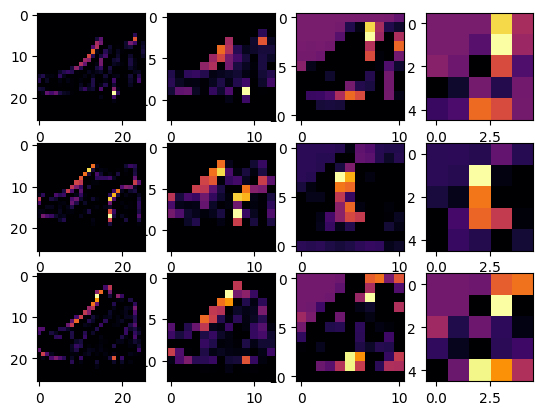

In [7]:
fix, ax = plt.subplots( 3, 4)

FIRST_IMG = 0
SECOND_IMG = 23
THIRD_IMG = 28

CONV_NUM = 23

layer_outputs = [ layer.output for layer in model.layers]
activation_model = tf.keras.models.Model( inputs=model.input, outputs=layer_outputs)

for x in range( 0, 4):
    f1 = activation_model.predict( test_X[ FIRST_IMG].reshape( 1, 28, 28, 1))[ x]
    ax[ 0, x].imshow( f1[ 0, :, :, CONV_NUM], cmap="inferno")
    ax[ 0, x].grid( False)

    f2 = activation_model.predict( test_X[ SECOND_IMG].reshape( 1, 28, 28, 1))[ x]
    ax[ 1, x].imshow( f2[ 0, :, :, CONV_NUM], cmap="inferno")
    ax[ 1, x].grid( False)

    f3 = activation_model.predict( test_X[ THIRD_IMG].reshape( 1, 28, 28, 1))[ x]
    ax[ 2, x].imshow( f3[ 0, :, :, CONV_NUM], cmap="inferno")
    ax[ 2, x].grid( False)